In [151]:
#import required libraries
# from IPython.display import Image
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# import warnings
# warnings.filterwarnings("ignore")

In [152]:
#create dataframe from trainning data
df1=pd.read_csv("C:/Users/HP/Documents/Y4 S2/research/models & other/models/datasets/dreaddit-train.csv")

In [153]:
df1.shape

(2838, 116)

In [154]:
df1.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
126,relationships,7sdyx6,"(30, 35)",Her parents supported her. I told her I though...,43108,0,1.0,1516709505,1,3.704329,...,1.25,1.125,1.0,1.71754,1.70462,1.94297,0.6,10,4.739675,0.085374


In [155]:
#create a dataframe from testing data
df2=pd.read_csv("C:/Users/HP/Documents/Y4 S2/research/models & other/models/datasets/dreaddit-test.csv")

In [156]:
df2.shape

(715, 116)

In [157]:
df2.sample()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
444,1686,domesticviolence,7kkz51,"[91, 96]",I don't know what to do and i need some help. ...,1,1.0,1.513601e+09,3,-0.451308,...,1.4,1.0,1.0,1.74613,1.404,1.91776,1.0,4,2.497143,0.0


In [158]:
#merge the data frames
df3 = pd.concat([df1, df2])
# df3=df1.append(df2) 

In [159]:
df3.shape

(3553, 116)

In [160]:
df3.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [161]:
#columns of the dataset
df3.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [162]:
#summary of the dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [163]:
#missing values in the dataframe columns
df3.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [164]:
#import textblob library for sentiment analysis
from textblob import TextBlob

In [165]:
#calculates the sentiment polarity
#-1 represents a negative sentiment
#1 represents a positive sentiment
#0 represents a neutral sentiment
TextBlob("the best").polarity 

1.0

In [166]:
#subjectivity 
#0 represents an objective text with no personal opinion
#1 represents a subjective text with a strong personal opinion
TextBlob("the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [167]:
#detect sentiment function
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [168]:
#add "text" column to the dataframe
df4=df3[["text"]]

In [169]:
df4.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


In [170]:
#applies the function detect_sentiment to each element in the "sentiment" column
df4["sentiment"]=df4["text"].apply(detect_sentiment)

C:\Users\HP\AppData\Local\Temp\ipykernel_1096\526051754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["sentiment"]=df4["text"].apply(detect_sentiment)


In [171]:
df4.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [172]:
df4.sentiment.value_counts()

sentiment
 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: count, Length: 2627, dtype: int64

In [173]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [174]:
stopwords = set(stopwords.words("english"))

In [175]:
#clean up unnecessary marks
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df4["text"] = df4["text"].apply(clean)

C:\Users\HP\AppData\Local\Temp\ipykernel_1096\806390543.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["text"] = df4["text"].apply(clean)


In [176]:
df4["text"]

0      said felt way sugget go rest trigger ahead you...
1      hey rassist sure right place post goe  im curr...
2      mom hit newspap shock would know dont like pla...
3      met new boyfriend amaz kind sweet good student...
4      octob domest violenc awar month domest violenc...
                             ...                        
710    horribl vivid nightmar everi night sometim the...
711    also cant think without get angri jealous talk...
712    furthermor told got realli serious anxieti dep...
713    here link amazon wish list two item  link does...
714    keep us protect alreadi told unwelcom person l...
Name: text, Length: 3553, dtype: object

In [124]:
# def wc(data,bgcolor):
#     plt.figure(figsize=(20,20))
#     mask=np.array(Image.open('C:/Users/HP/Documents/Y4 S1/research/models/datasets/stress-954814_960_720.png'))
#     wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
#     wc.generate(' '.join(data))
#     plt.imshow(wc)
#     plt.axis("off")

In [125]:
# wc(df4.text,'white')

In [177]:
df4["label"]=df3["label"].map({0: "No Stress", 1: "Stress"})
df4=df4[["text", "label"]]

C:\Users\HP\AppData\Local\Temp\ipykernel_1096\4180224205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["label"]=df3["label"].map({0: "No Stress", 1: "Stress"})


In [178]:
df4.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [179]:
df4["sentiment"]=df4["text"].apply(detect_sentiment)

In [180]:
df4.head()

,text,label,sentiment
0,said felt way sugget go rest trigger ahead you...,Stress,0.027273
1,hey rassist sure right place post goe im curr...,No Stress,0.340816
2,mom hit newspap shock would know dont like pla...,Stress,0.124091
3,met new boyfriend amaz kind sweet good student...,Stress,0.229172
4,octob domest violenc awar month domest violenc...,Stress,0.083333


In [181]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

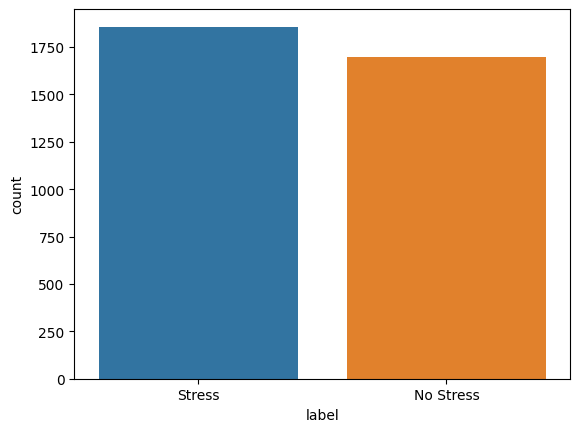

In [131]:
sns.countplot(x=df4.label)

In [182]:
x=df4.text
y=df4.label

In [183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [184]:
vect=CountVectorizer(stop_words="english")

In [185]:
x=vect.fit_transform(df4.text)

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [187]:
mnb=MultinomialNB()

In [188]:
pred1=mnb.fit(x_train,y_train).predict(x_test)

In [189]:
accuracy_score(pred1,y_test)

0.7454289732770746

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [193]:
pred2=dc.predict(x_test)
accuracy_score(y_test,pred2)

0.6258790436005626

In [194]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [195]:
pred3=bnb.predict(x_test)
accuracy_score(y_test,pred3)

0.7552742616033755

In [145]:
from xgboost import XGBClassifier
Xg = XGBClassifier()
Xg.fit(x_train,y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No Stress' 'Stress']

In [147]:
user="everyday ECEMBER -ISA EMBER BER FRESH R START"

In [148]:
#Binomial Naive Bayes
df4=vect.transform([user]).toarray()
output=bnb.predict(df4)
print(output)

['No Stress']


In [150]:
# exporting model to pickle file
import pickle 
with open('depression_recognition_model2.pickle','wb') as f:
  pickle.dump(dc, f)

In [ ]:
# label_counts = df1['label'].value_counts()
# print(label_counts)


In [ ]:
# label_counts = df2['label'].value_counts()
# print(label_counts)
